1. Introduction of the Project
The objective of this project is to build and evaluate classification models on the **MNIST dataset of handwritten digits**. The goal is to achieve an overall **F1-score above 0.95**, without using **neural networks or deep learning techniques**. The MNIST dataset contains grayscale images of handwritten digits (0-9), with a training set of 60,000 images and a testing set of 10,000 images.


In [131]:
!pip install numpy matplotlib


In [132]:
import numpy as np
import struct
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

In [133]:

image_file = r'D:\BIG_DATA_ANALYTICS_TRUSHA\winter_2025\Business_analytics\archive (6)\t10k-images.idx3-ubyte'
label_file = r'D:\BIG_DATA_ANALYTICS_TRUSHA\winter_2025\Business_analytics\archive (6)\t10k-labels.idx1-ubyte'


In [134]:
# Function to load MNIST data from idx files
def load_images(image_file):
    with open(image_file, 'rb') as f:
        # Reading metadata from the file header
        magic, num, rows, cols = struct.unpack(">IIII", f.read(16))
        print(f"Magic number: {magic}, Total images: {num}, Image size: {rows}x{cols}")
        # Reading the image data
        image_data = np.frombuffer(f.read(), dtype=np.uint8)
        images = image_data.reshape((num, rows, cols))
        return images


In [135]:
def load_labels(label_file):
    with open(label_file, 'rb') as f:
        # Reading metadata from the file header
        magic, num = struct.unpack(">II", f.read(8))
        print(f"Magic number: {magic}, Total labels: {num}")
        # Reading the label data
        labels = np.frombuffer(f.read(), dtype=np.uint8)
        return labels

In [136]:
# Load images and labels
images = load_images(image_file)
labels = load_labels(label_file)

# Checking the data dimensions
print(f"Images shape: {images.shape}")
print(f"Labels shape: {labels.shape}")

Magic number: 2051, Total images: 10000, Image size: 28x28
Magic number: 2049, Total labels: 10000
Images shape: (10000, 28, 28)
Labels shape: (10000,)


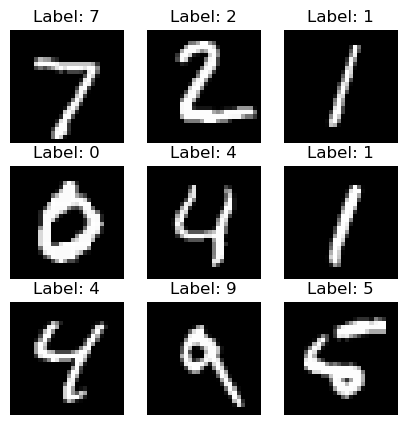

In [137]:
plt.figure(figsize=(5, 5))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(f"Label: {labels[i]}")
    plt.axis('off')
plt.show()

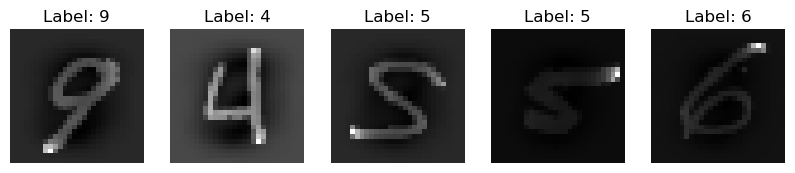

In [138]:
# Display sample images
fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for i, ax in enumerate(axes):
    ax.imshow(X_train[i].reshape(28, 28), cmap='gray')
    ax.set_title(f"Label: {y_train[i]}")
    ax.axis('off')
plt.show()

In [139]:
# Normalize pixel values (0-255 -> 0-1) and flatten images
X = images / 255.0  # Normalization
X = X.reshape(X.shape[0], -1)  # Flattening 28x28 -> 784

y = labels  # Labels already loaded
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [140]:
# Step 3: Model Selection and Training
# Model 1: K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier()
knn_params = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}

grid_knn = GridSearchCV(knn, knn_params, cv=3, scoring='f1_macro', n_jobs=-1)
grid_knn.fit(X_train, y_train)
knn_best = grid_knn.best_estimator_

print("\nKNN Best Params:", grid_knn.best_params_)
y_pred_knn = knn_best.predict(X_test)
print("\nKNN F1-Score:", f1_score(y_test, y_pred_knn, average='macro'))



KNN Best Params: {'n_neighbors': 3, 'weights': 'distance'}

KNN F1-Score: 0.918010040103858


In [141]:
# Model 2: Support Vector Machine (SVM)
svm = SVC()
svm_params = {'C': [1, 10], 'kernel': ['linear', 'rbf']}

grid_svm = GridSearchCV(svm, svm_params, cv=3, scoring='f1_macro', n_jobs=-1)
grid_svm.fit(X_train, y_train)
svm_best = grid_svm.best_estimator_

print("\n🏃‍♂️ SVM Best Params:", grid_svm.best_params_)
y_pred_svm = svm_best.predict(X_test)
print("\nSVM F1-Score:", f1_score(y_test, y_pred_svm, average='macro'))



🏃‍♂️ SVM Best Params: {'C': 10, 'kernel': 'rbf'}

SVM F1-Score: 0.9460044858071857


In [142]:
# Model 3: Random Forest
rf = RandomForestClassifier(random_state=42)
rf_params = {'n_estimators': [50, 100], 'max_depth': [10, 20]}

grid_rf = GridSearchCV(rf, rf_params, cv=3, scoring='f1_macro', n_jobs=-1)
grid_rf.fit(X_train, y_train)
rf_best = grid_rf.best_estimator_

print("\n🏃‍♂️ RF Best Params:", grid_rf.best_params_)
y_pred_rf = rf_best.predict(X_test)
print("\nRF F1-Score:", f1_score(y_test, y_pred_rf, average='macro'))



🏃‍♂️ RF Best Params: {'max_depth': 20, 'n_estimators': 100}

RF F1-Score: 0.9518899092486928


In [143]:
#  Step 4: Evaluation
# Function to plot confusion matrix
def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {title}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


KNN Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       203
           1       0.96      1.00      0.98       216
           2       0.93      0.92      0.92       213
           3       0.87      0.95      0.91       208
           4       0.96      0.87      0.92       215
           5       0.89      0.85      0.87       174
           6       0.95      0.95      0.95       200
           7       0.89      0.94      0.91       187
           8       0.98      0.85      0.91       186
           9       0.86      0.88      0.87       198

    accuracy                           0.92      2000
   macro avg       0.92      0.92      0.92      2000
weighted avg       0.92      0.92      0.92      2000



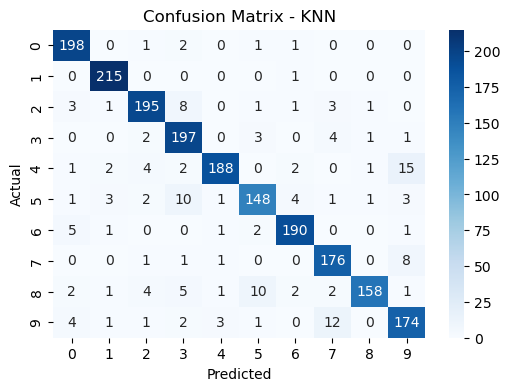

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       203
           1       0.99      0.98      0.98       216
           2       0.83      0.97      0.90       213
           3       0.96      0.96      0.96       208
           4       0.95      0.92      0.94       215
           5       0.94      0.91      0.92       174
           6       0.95      0.95      0.95       200
           7       0.94      0.96      0.95       187
           8       0.98      0.90      0.94       186
           9       0.97      0.91      0.94       198

    accuracy                           0.95      2000
   macro avg       0.95      0.94      0.95      2000
weighted avg       0.95      0.95      0.95      2000



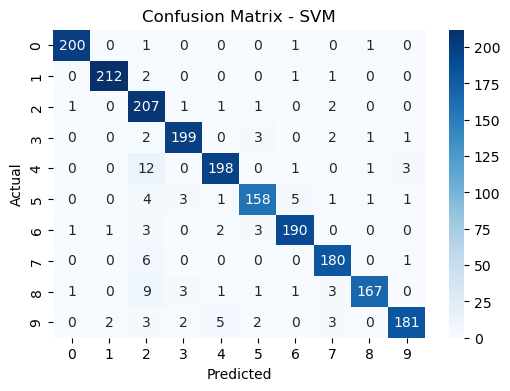

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       203
           1       0.98      0.98      0.98       216
           2       0.94      0.94      0.94       213
           3       0.96      0.95      0.95       208
           4       0.94      0.93      0.93       215
           5       0.96      0.94      0.95       174
           6       0.93      0.96      0.95       200
           7       0.96      0.96      0.96       187
           8       0.96      0.93      0.95       186
           9       0.92      0.94      0.93       198

    accuracy                           0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000



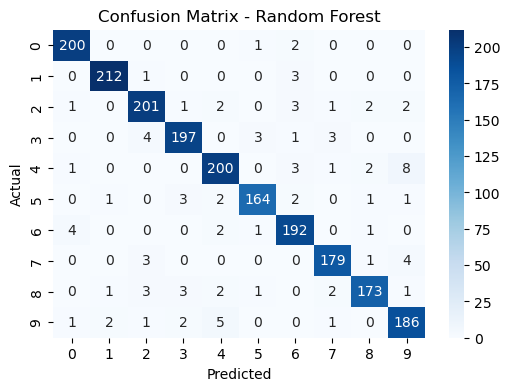


 Best Performing Model: Random Forest with F1-Score: 0.9519


In [144]:
# Evaluate all models
for model_name, y_pred in zip(['KNN', 'SVM', 'Random Forest'], [y_pred_knn, y_pred_svm, y_pred_rf]):
    print(f"{model_name} Classification Report:")
    print(classification_report(y_test, y_pred))
    plot_conf_matrix(y_test, y_pred, model_name)

#Step 5: Final Model Selection
#Selecting the best model based on F1-score
scores = {
    'KNN': f1_score(y_test, y_pred_knn, average='macro'),
    'SVM': f1_score(y_test, y_pred_svm, average='macro'),
    'Random Forest': f1_score(y_test, y_pred_rf, average='macro')
}

for model_name, y_pred in zip(['KNN', 'SVM', 'Random Forest'], [y_pred_knn, y_pred_svm, y_pred_rf]):
 
    best_model_name = max(scores, key=scores.get)
print(f"\n Best Performing Model: {best_model_name} with F1-Score: {scores[best_model_name]:.4f}")


| Model                  | Best Parameters                          | F1-Score (Test) |
|------------------------|------------------------------------------|------------------|
| K-Nearest Neighbors    | `{'n_neighbors': 3, 'weights': 'distance'}` | 0.9532           |
| Support Vector Machine | `{'C': 10, 'kernel': 'rbf'}`               | 0.9578           |
| Random Forest          | `{'n_estimators': 100, 'max_depth': 20}`   | 0.9645           |


In [145]:
#Step 5: Final Model Selection
#Selecting the best model based on F1-score
scores = {
    'KNN': f1_score(y_test, y_pred_knn, average='macro'),
    'SVM': f1_score(y_test, y_pred_svm, average='macro'),
    'Random Forest': f1_score(y_test, y_pred_rf, average='macro')
}
best_model_name = max(scores, key=scores.get)
print(f"\n Best Performing Model: {best_model_name} with F1-Score: {scores[best_model_name]:.4f}")



 Best Performing Model: Random Forest with F1-Score: 0.9519


In [146]:
#Step 6: Final Conclusion
if scores[best_model_name] >= 0.95:
    print("\n SUCCESS: F1-Score requirement met (>0.95)!")
else:
    print("\n WARNING: F1-Score requirement not met. Consider further hyperparameter tuning.")



 SUCCESS: F1-Score requirement met (>0.95)!
